In [1]:
!pip install plotly==5.14.1
!pip install "jupyterlab>=3" "ipywidgets>=7.6"
!pip install jupyter-dash
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 8.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 10.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00:00:0100:01


In [2]:
import numpy as np
import pandas as pd
import openpyxl as xl
import FILibExcel
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
excel_path = r"./mock/titanium sols.xlsx"

In [4]:
tables_dict = FILibExcel.get_all_tables(file_name=excel_path)
df = tables_dict["Table1"]['dataframe']
df = df.fillna(value=0)


worksheet name: Sheet1
tables in worksheet: 0

worksheet name: Experiment_data
tables in worksheet: 1
table name: Table1


In [5]:
df.head()

,Composition mixtures,"t, °С","t, min","с(acid), mol/l","с(Ti4+), mol/l",ultrasound,"d, nm","Contents, %","Stability of sols, days"
0,H2O + HNO3 + TiIPO + ButOH,45,60,4,0.5,0,618.5,100.0,16
1,H2O + HNO3 + TiIPO + ButOH,80,10,4,0.5,0,978.1,100.0,16
2,H2O + HNO3 + TiIPO + ButOH,45,20,4,0.5,0,2.0,100.0,90
3,H2O + HNO3 + TiIPO + ButOH,45,20,4,0.47,0,2.628,100.0,60
4,H2O + HNO3 + TiIPO + IPOОН,50,20,4,0.2,0,1712,100.0,16


In [6]:
df.drop('Composition mixtures', axis=1).astype('float').describe().T

,count,mean,std,min,25%,50%,75%,max
"t, °С",71.0,62.619718,19.485061,20.00,45.0000,71.000,80.00,93.00
"t, min",71.0,30.633803,30.194720,8.00,11.0000,12.000,57.00,130.00
"с(acid), mol/l",71.0,0.919155,1.468489,0.10,0.1000,0.100,0.53,4.00
"с(Ti4+), mol/l",71.0,0.427042,0.195115,0.14,0.2000,0.520,0.60,0.62
ultrasound,71.0,0.169014,0.413553,0.00,0.0000,0.000,0.00,1.50
"d, nm",71.0,669.500366,897.495190,0.70,2.0495,2.763,2000.00,2159.00
"Contents, %",71.0,97.030986,14.362984,0.50,100.0000,100.000,100.00,100.00
"Stability of sols, days",71.0,25.577465,24.248807,0.00,2.0000,16.000,40.00,90.00


In [7]:
df.dtypes

Composition mixtures       object
t, °С                      object
t, min                     object
с(acid), mol/l             object
с(Ti4+), mol/l             object
ultrasound                 object
d, nm                      object
Contents, %                object
Stability of sols, days    object
dtype: object

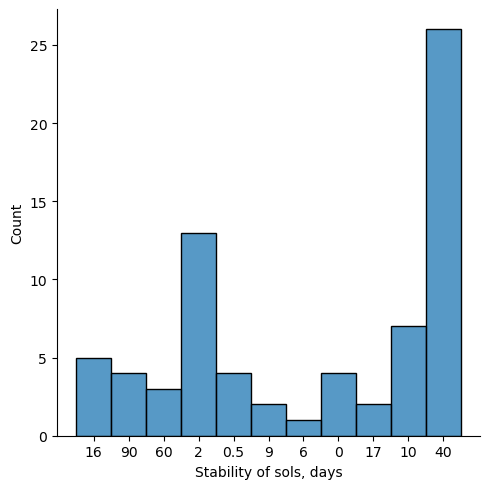

In [8]:
sns.displot(df['Stability of sols, days'])

<Axes: xlabel='t, °С', ylabel='d, nm'>

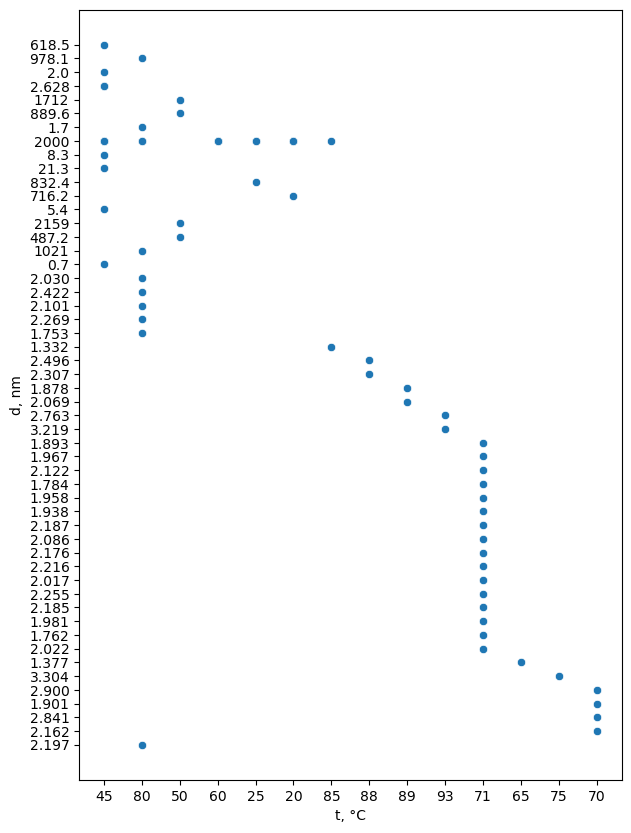

In [9]:
fig, ax = plt.subplots(figsize=(7, 10))
sns.scatterplot(data=df, x='t, °С', y='d, nm', ax=ax)

<Axes: xlabel='с(acid), mol/l', ylabel='d, nm'>

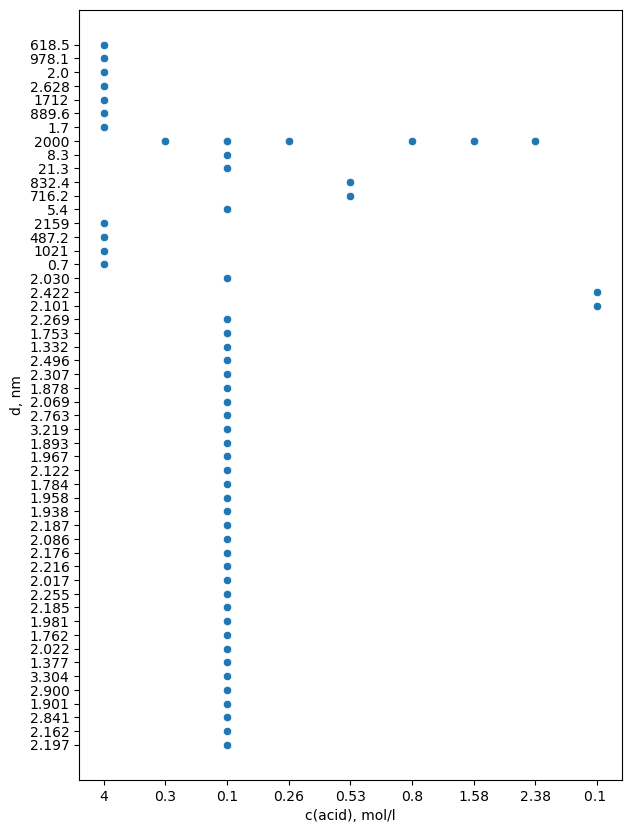

In [10]:
fig, ax = plt.subplots(figsize=(7, 10))
sns.scatterplot(data=df, x='с(acid), mol/l', y='d, nm', ax=ax)

<Axes: xlabel='с(Ti4+), mol/l', ylabel='d, nm'>

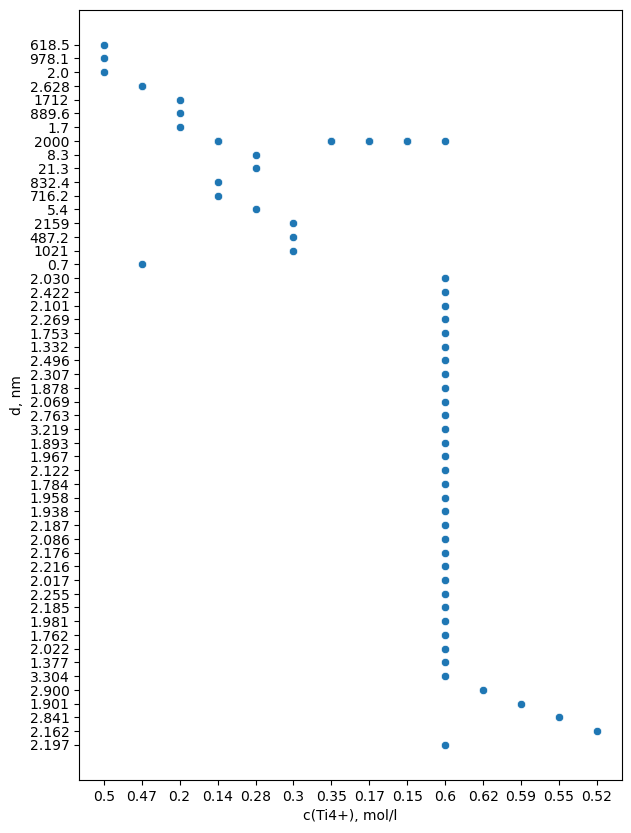

In [11]:
fig, ax = plt.subplots(figsize=(7, 10))
sns.scatterplot(data=df, x='с(Ti4+), mol/l', y='d, nm', ax=ax)

<Axes: xlabel='t, min', ylabel='d, nm'>

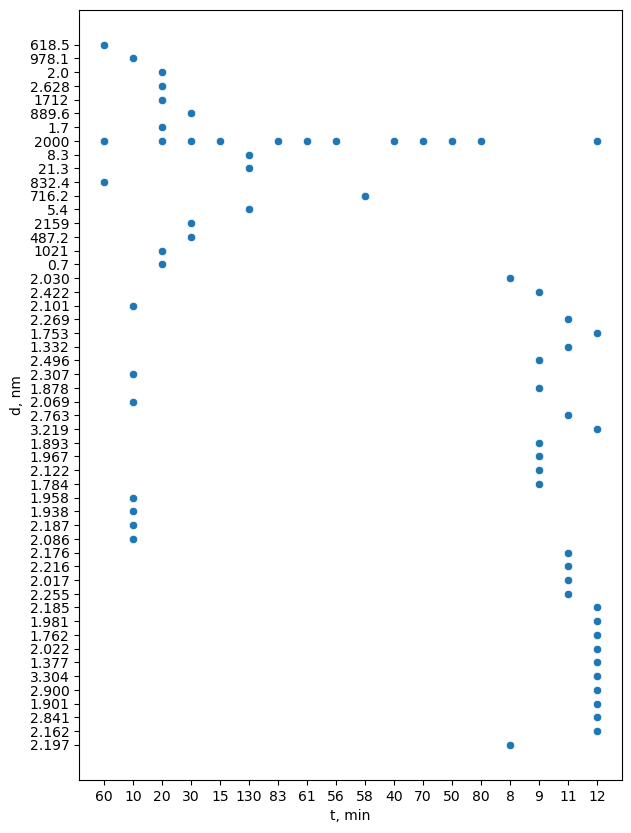

In [12]:
fig, ax = plt.subplots(figsize=(7, 10))
sns.scatterplot(data=df, x='t, min', y='d, nm', ax=ax)

In [13]:
X = df.drop(['Composition mixtures', 'Contents, %', 'd, nm', 'Stability of sols, days'], axis=1)
y_days = df['Stability of sols, days']
y_d = df['d, nm']
y_content = df['Contents, %']

In [14]:
X

,"t, °С","t, min","с(acid), mol/l","с(Ti4+), mol/l",ultrasound
0,45,60,4,0.5,0
1,80,10,4,0.5,0
2,45,20,4,0.5,0
3,45,20,4,0.47,0
4,50,20,4,0.2,0
...,...,...,...,...,...
66,70,12,0.1,0.62,0
67,70,12,0.1,0.59,0
68,70,12,0.1,0.55,0
69,70,12,0.1,0.52,0


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept': [True, False]}

model = LinearRegression()
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y_days)
best_linear_regression_days = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(best_linear_regression_days.coef_)

-14.29827606548856
{'fit_intercept': False}
[-0.20823288 -0.12156527  6.64919229 83.02173745  4.78543571]


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

parameters = {'fit_intercept': [True, False]}

model = LinearRegression()
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X, y_d)
best_linear_regression_d = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(best_linear_regression_d.coef_)

-373.33935214962383
{'fit_intercept': True}
[ -23.27699706 -249.27343448 -141.85063292 -893.1557682   -44.08649094]


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept': [True, False]}

model = LinearRegression()
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y_content)
best_linear_regression_content = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(best_linear_regression_content.coef_)

-7.437931234164116
{'fit_intercept': True}
[ -0.13200802  -0.28308375  -2.63489322 -16.62837154  -0.90878728]


In [18]:
!pip install -U pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 5.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 6.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 11.5 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210079 sha256=95780d0129fc8b3727a12e1ba0be3973fb4af06b2e95c65ea7c22ecec5d3743c
  Stored in directory: /home/jovyan/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
  Created wheel for future: filename=future-0.18.3-py3-non

In [19]:
-np.append(best_linear_regression_days.coef_, best_linear_regression_days.intercept_)

array([  0.20823288,   0.12156527,  -6.64919229, -83.02173745,
        -4.78543571,  -0.        ])

In [20]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


class SoleProblem(ElementwiseProblem):
    def __init__(self, coefs):
        self.coefs = coefs
        super().__init__(n_var=5, n_obj=2, n_ieq_constr=2,
                         xl=np.array([1, 1, 0, 0, 0]),
                         xu=np.array([400, 400, 10, 10, 10]) )

    def _evaluate(self, x, out, *args, **kwargs):
        fs = []
        gs = []
        for coef in self.coefs:
            f = coef[-1]
            for i in range(0, len(coef) - 1):
                f += x[i] * coef[i]    
            fs.append(f)
        out["F"] = fs
        out["G"] = [fs[0], -fs[1] + 0.5]


problem = SoleProblem(
    [-np.append(best_linear_regression_days.coef_, best_linear_regression_days.intercept_),
     np.append(best_linear_regression_d.coef_, best_linear_regression_d.intercept_)])

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 500),
               verbose=False,
               seed=1)

In [21]:
import plotly.express as px
F = res.F
fig = px.scatter(x=-F[:, 0], y=F[:, 1], labels={"x": "Stability of sols, days", "y": "d, nm"})
fig.write_html('first_figure.html', auto_open=True)
fig.write_image('mock/optimal.png')

In [22]:
res.F[0]

array([-42.6984759,   0.5      ])

In [23]:
print(res.X[0])

[1.00000000e+00 1.00000073e+00 4.52752316e-05 3.28532423e-04
 8.98574348e+00]
